In [1]:
%reload_ext autoreload
import sys
sys.path.append("../utils/")

# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules

from braket.circuits import Circuit, Gate, Instruction, circuit, Observable,Qubit,QubitSet
from braket.devices import LocalSimulator
from braket.aws import AwsDevice
import numpy as np

import functools
import time

from utils import DeviceUtils,DeviceScanner,BraketTaskScanner,Plotter
from hadamard_bench import *
from pyquil import get_qc
from quil_utils import *

import json
import pandas as pd
import seaborn as sns

from Noise_siumulator_Aspen_M2 import *

In [2]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [3]:
circ = Circuit().H_line(2,2,'Rigetti')
#circ = Circuit().add_verbatim_box(circ)

In [6]:
noisy_circ,qubit_mapping = simulate_noise_aspen_m_2(circ)

[Instruction('operator': Rz('angle': 1.5707963267948966, 'qubit_count': 1), 'target': QubitSet([Qubit(31)])), Instruction('operator': AmplitudeDamping(0.0005073871774623484), 'target': QubitSet([Qubit(31)])), Instruction('operator': PhaseDamping(0.000719402447616535), 'target': QubitSet([Qubit(31)])), Instruction('operator': Depolarizing(0.0007571980103950882), 'target': QubitSet([Qubit(31)])), Instruction('operator': Rx('angle': 1.5707963267948966, 'qubit_count': 1), 'target': QubitSet([Qubit(31)])), Instruction('operator': AmplitudeDamping(0.0005073871774623484), 'target': QubitSet([Qubit(31)])), Instruction('operator': PhaseDamping(0.000719402447616535), 'target': QubitSet([Qubit(31)])), Instruction('operator': Depolarizing(0.0007571980103950882), 'target': QubitSet([Qubit(31)])), Instruction('operator': Rz('angle': 1.5707963267948966, 'qubit_count': 1), 'target': QubitSet([Qubit(31)])), Instruction('operator': AmplitudeDamping(0.0005073871774623484), 'target': QubitSet([Qubit(31)])

In [7]:
noisy_circ

Circuit('instructions': [Instruction('operator': Rz('angle': 1.5707963267948966, 'qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': AmplitudeDamping(0.0005073871774623484), 'target': QubitSet([Qubit(0)])), Instruction('operator': PhaseDamping(0.000719402447616535), 'target': QubitSet([Qubit(0)])), Instruction('operator': Depolarizing(0.0007571980103950882), 'target': QubitSet([Qubit(0)])), Instruction('operator': Rx('angle': 1.5707963267948966, 'qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': AmplitudeDamping(0.0005073871774623484), 'target': QubitSet([Qubit(0)])), Instruction('operator': PhaseDamping(0.000719402447616535), 'target': QubitSet([Qubit(0)])), Instruction('operator': Depolarizing(0.0007571980103950882), 'target': QubitSet([Qubit(0)])), Instruction('operator': Rz('angle': 1.5707963267948966, 'qubit_count': 1), 'target': QubitSet([Qubit(0)])), Instruction('operator': AmplitudeDamping(0.0005073871774623484), 'target': QubitS

In [10]:
local_sim = DeviceUtils.get_device('dm1')

In [12]:
task = local_sim.run(noisy_circ,shots=1000)

In [14]:
scanner = BraketTaskScanner(qtask= task)

In [17]:
results = scanner.get_results()

In [19]:
results.measurement_counts

Counter({'00': 983, '01': 11, '10': 6})

In [136]:
qc = get_qc(name='Aspen-M-2',as_qvm=True)

In [46]:
quil_circ = scanners[0].get_compiled_circuit()

In [99]:
quil_circ.splitlines()

AttributeError: 'str' object has no attribute 'split_line'

In [22]:
a = noisy_circ.instructions[5].target.item_list[0]

In [23]:
type(a)

braket.circuits.qubit.Qubit

In [ ]:
nois

In [118]:
quil_prog = Program()
preserve_block_not_closed = True
for line in quil_circ.splitlines():
    if 'MEASURE' in line and preserve_block_not_closed:
        quil_prog.inst('PRAGMA PRESERVE_BLOCK')
        preserve_block_not_closed = False
    quil_prog.inst(line)
    if 'RESET' in line:
        quil_prog.inst('PRAGMA PRESERVE_BLOCK')

In [133]:
Compiled_Circuit(qc,quil_prog).executable

In [14]:
qc.run()

NameError: name 'qc' is not defined

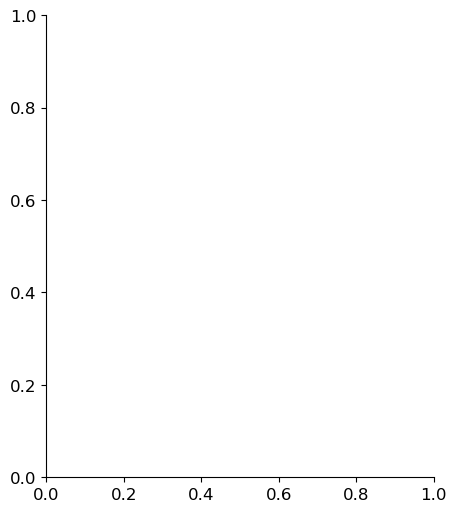

In [20]:
fig,ax = plt.subplots(1,1,figsize = (5,6))

In [23]:
ax